In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
input_data = "../data/processed/ecg-id-database-1.0.0/Person_01_rec_1.csv"

with open(input_data, "r") as in_data:
    full_dataset = pd.read_csv(in_data)

In [3]:
ecg_data = full_dataset['ECG_I_filtered'].values

In [4]:
ecg_data

array([-0.115, -0.115, -0.12 , ..., -0.035, -0.035, -0.035])

In [5]:
ecg_data = pd.Series(ecg_data)

<Axes: >

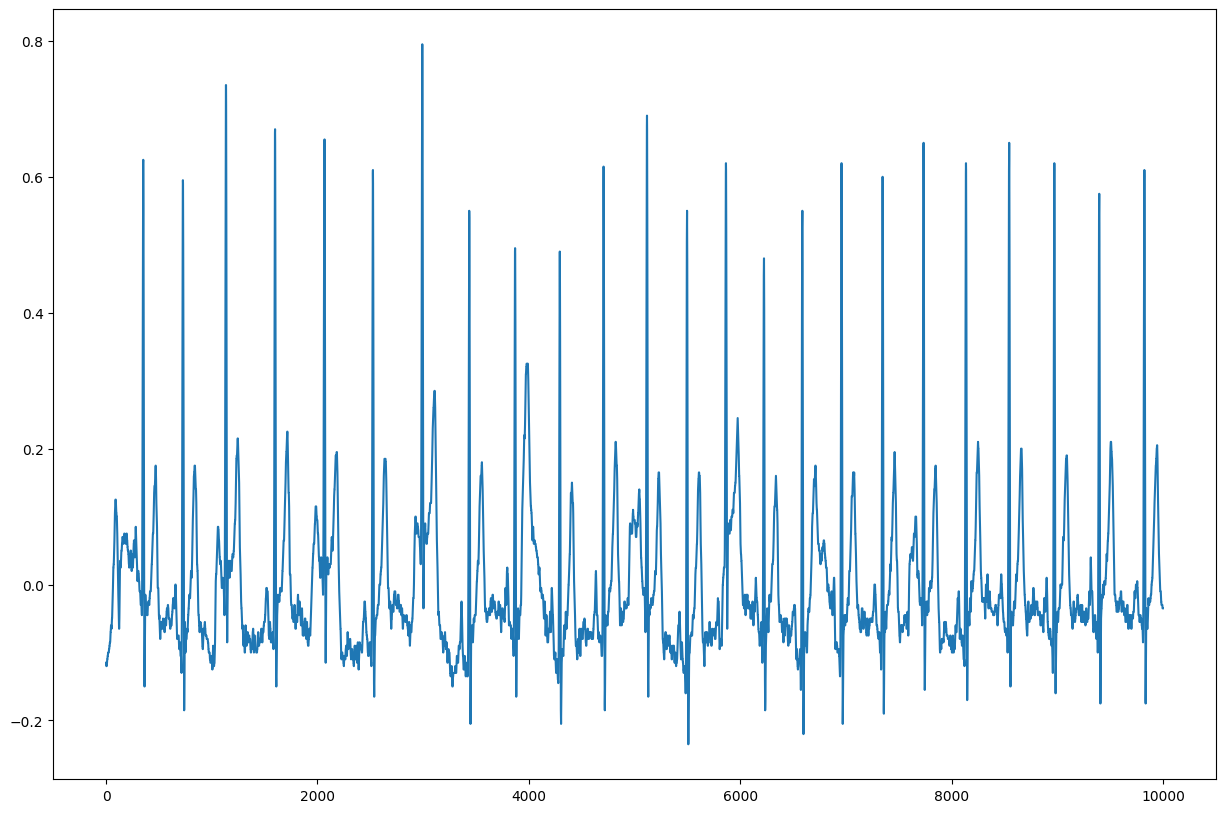

In [6]:
plt.figure(figsize=(15, 10))

ecg_data.plot()

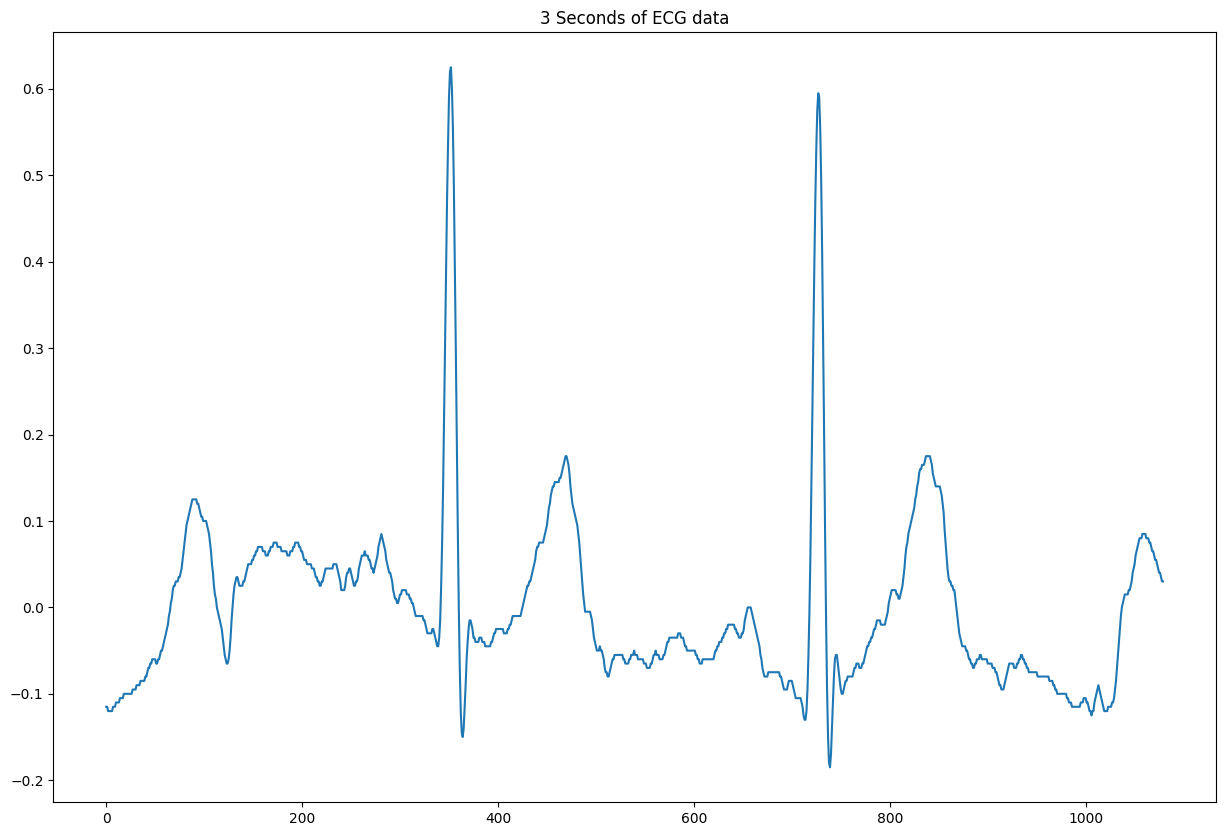

In [7]:
# 3 seconds worth of ECG data
plt.figure(figsize=(15, 10))
ecg_data[:1080].plot()
plt.title("3 Seconds of ECG data")

plt.show()

## Zooming in on one heartbeat

<Axes: >

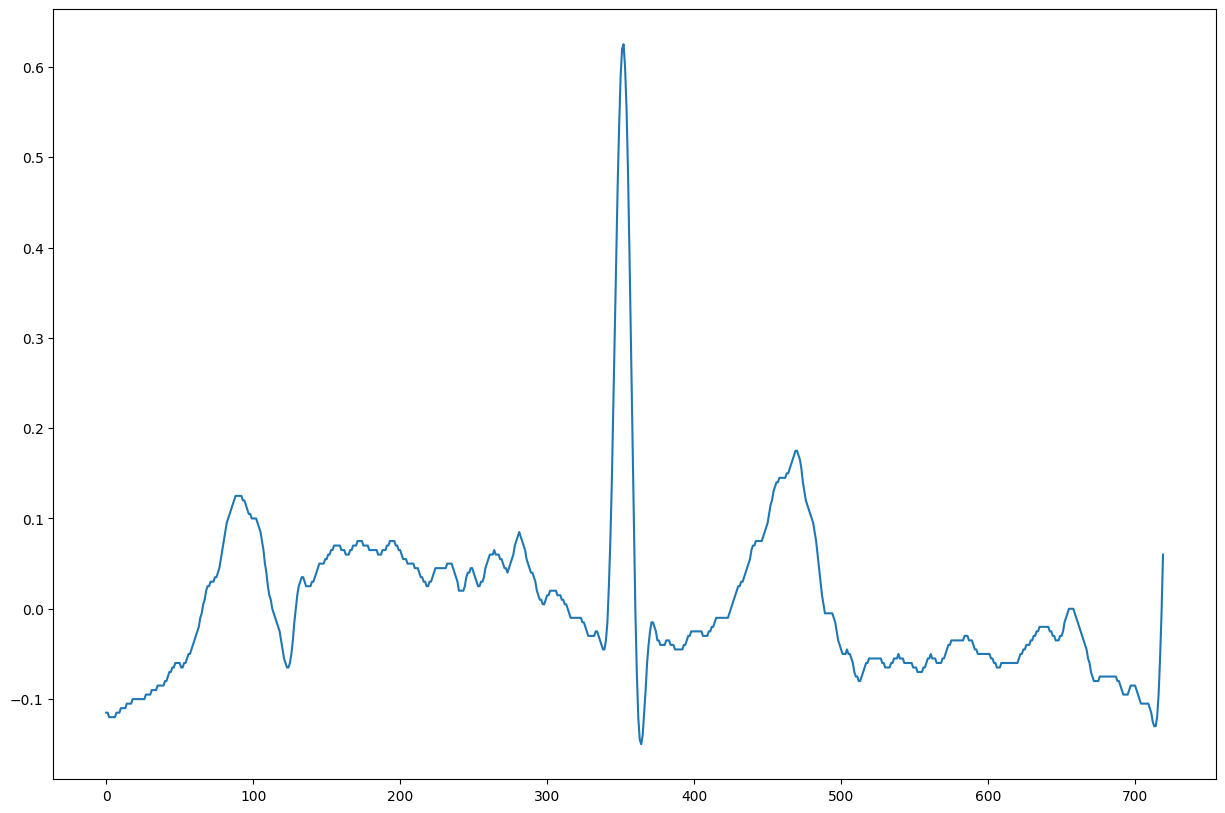

In [8]:
plt.figure(figsize=(15, 10))
ecg_data[:720].plot()

# Labeling the R Waves

In [9]:
# We need a height as a threshold
r_waves, metadata = scipy.signal.find_peaks(ecg_data[:1080], height=0.5)

In [10]:
r_waves

array([352, 727])

## Plotting each identified R wave

Text(0.5, 1.0, 'Labeled R waves for three seconds')

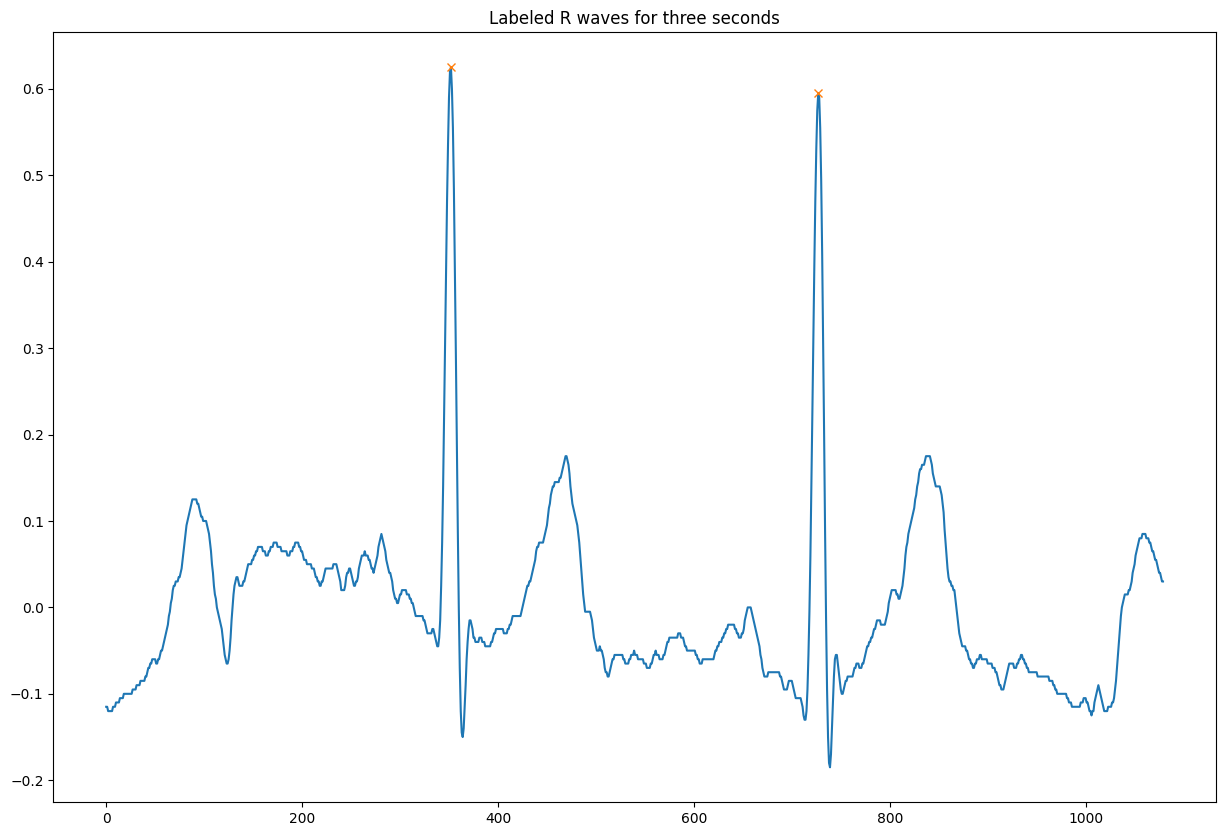

In [11]:
plt.figure(figsize=(15, 10))

three_second_ecg = ecg_data[:1080]

plt.plot(three_second_ecg)
plt.plot(r_waves, three_second_ecg[r_waves], "x")
plt.title("Labeled R waves for three seconds")

## Flattening the ECG

<Axes: >

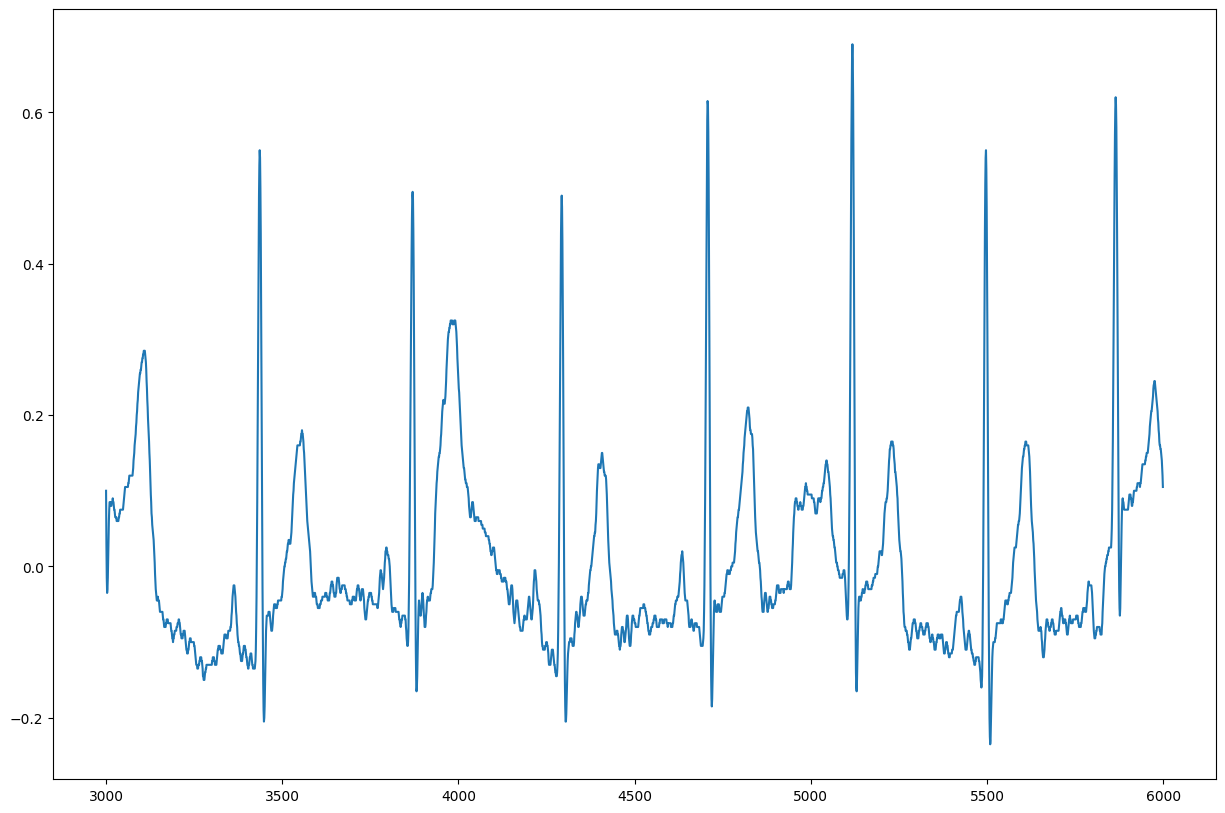

In [12]:
plt.figure(figsize=(15, 10))
ecg_data[3000:6000].plot()

Text(0.5, 1.0, '20 seconds of ECG data')

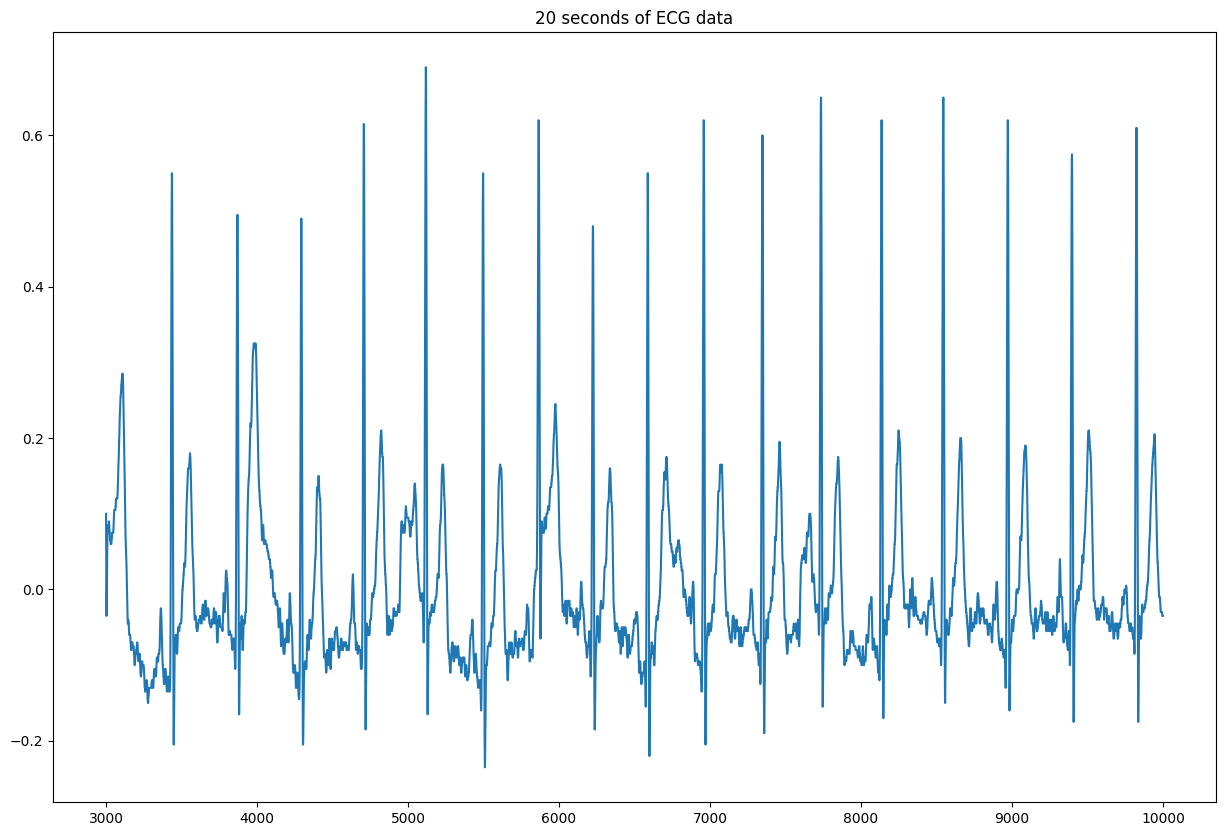

In [13]:
plt.figure(figsize=(15, 10))

ecg_20_seconds = ecg_data[3000:10200]
ecg_20_seconds.plot()
plt.title("20 seconds of ECG data")

In [14]:
wandering_baseline = scipy.signal.medfilt(ecg_20_seconds, kernel_size=361)

In [15]:
wandering_baseline = pd.Series(wandering_baseline)

<Axes: >

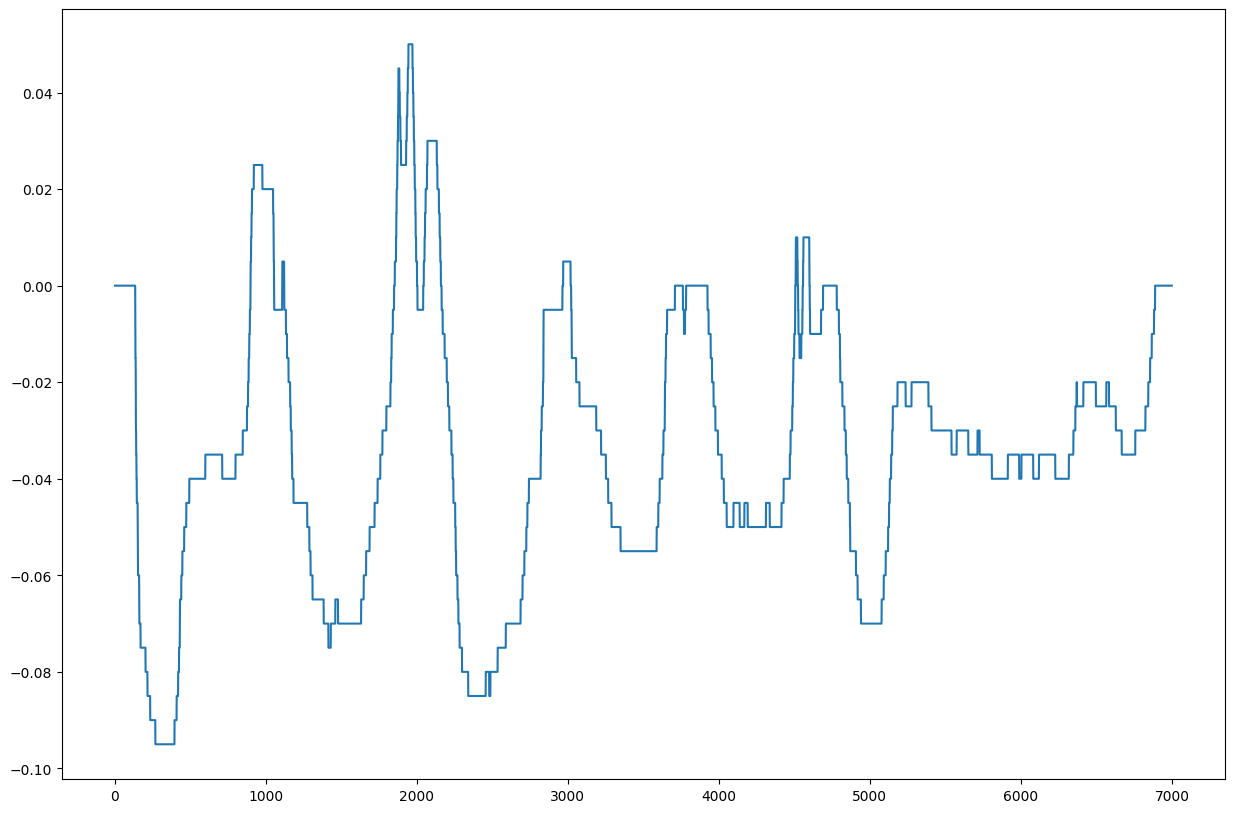

In [16]:
plt.figure(figsize=(15, 10))

wandering_baseline.plot()

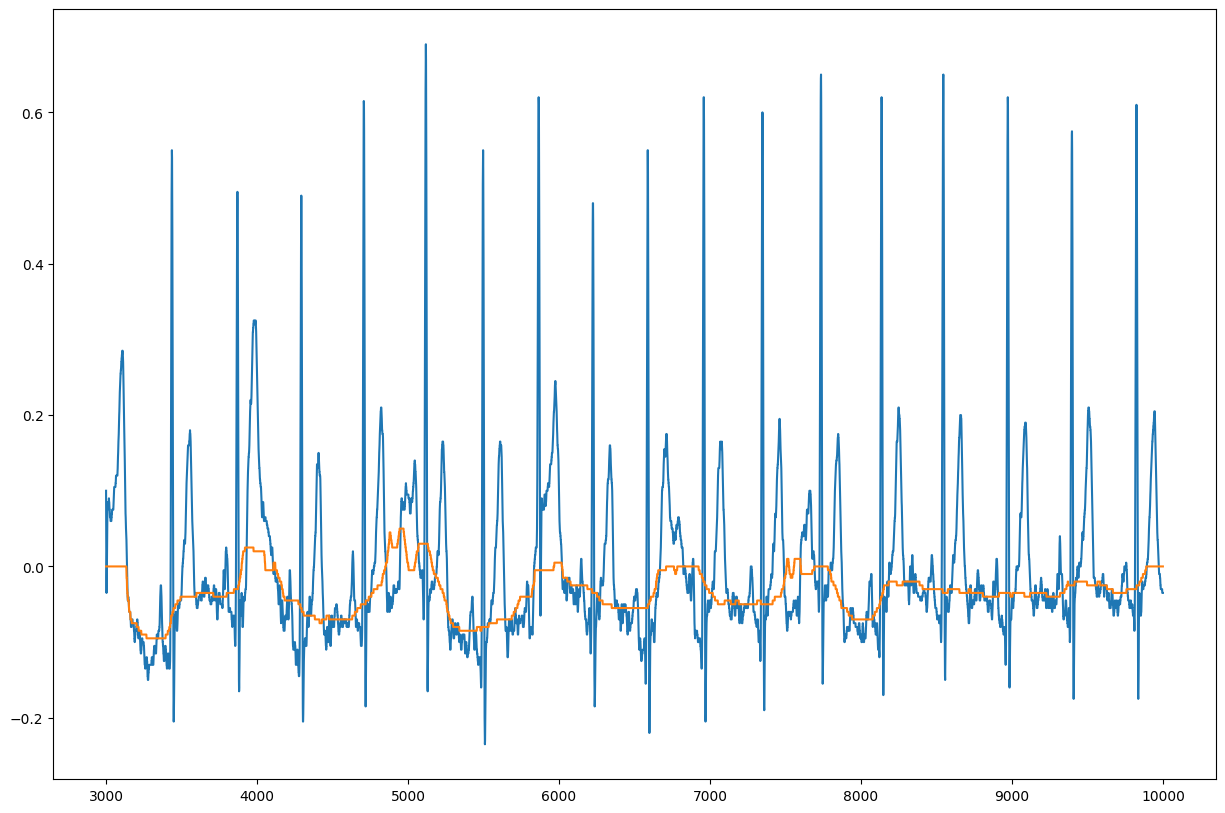

In [17]:
plt.figure(figsize=(15, 10))

wandering_baseline.index += 3000

ecg_20_seconds.plot()
plt.plot(wandering_baseline)

In [18]:
flattened_ecg = ecg_20_seconds - wandering_baseline

<Axes: >

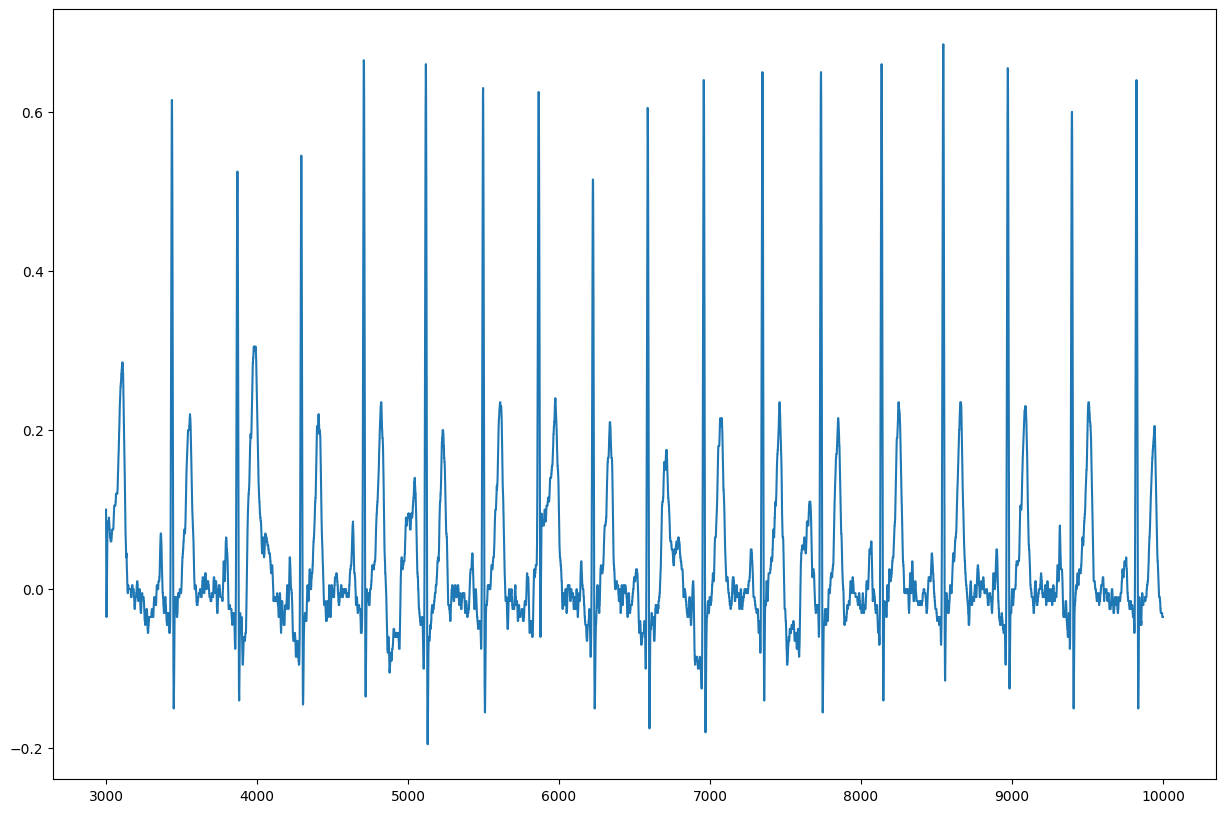

In [19]:
plt.figure(figsize=(15, 10))

flattened_ecg.plot()

## Labeling all of R waves

In [20]:
r_waves, metadata = scipy.signal.find_peaks(flattened_ecg, height=0.5, distance=30)

In [21]:
r_waves += 3000

In [22]:
r_waves

array([3436, 3870, 4293, 4707, 5118, 5497, 5865, 6224, 6587, 6958, 7347,
       7735, 8136, 8545, 8972, 9397, 9824])

Text(0.5, 1.0, '20 second ECG with labeled R waves')

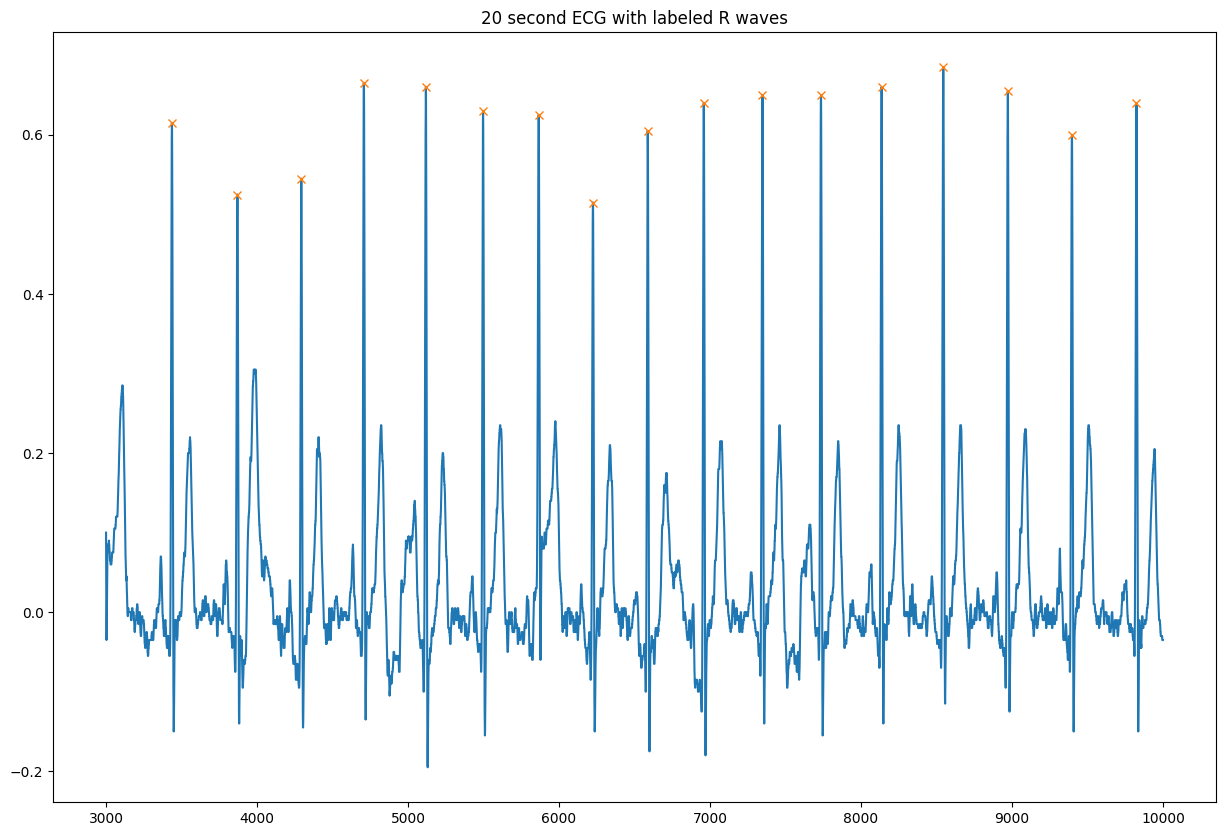

In [23]:
plt.figure(figsize=(15, 10))

flattened_ecg.plot()
plt.plot(r_waves, flattened_ecg[r_waves], "x")
plt.title("20 second ECG with labeled R waves")

In [24]:
frequency = 360
seconds = 20
heartbeats = len(r_waves)
heartbeats

17